In [1]:
# Mall Customer Clustering ML model using K-Means algorithm
# Date : 08-03-2024
# Author : Suman Das
# DataSet : Mall_Customers.csv

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.cluster import KMeans

In [7]:
df=pd.read_csv("D:\Mall_Customers.csv")

In [8]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [9]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
df.shape

(200, 4)

In [12]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


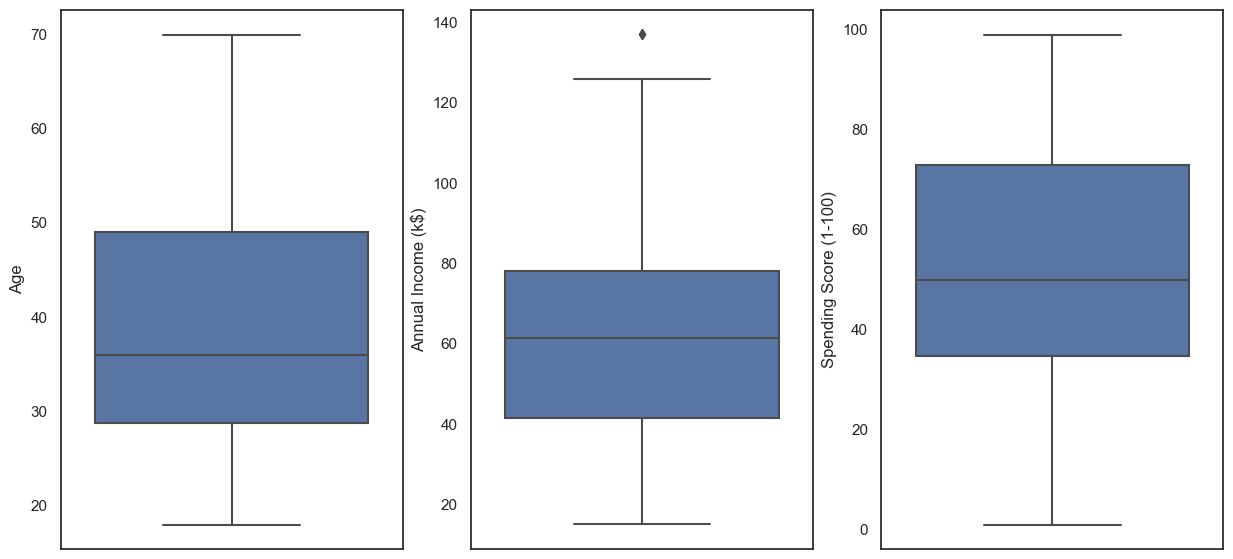

In [14]:
#check outlier
sns.set(style="white")
fig,axes=plt.subplots(1,3,sharex=True,figsize=(15,7))
sns.boxplot(data=df,x=None,y=df['Age'],ax=axes[0])
sns.boxplot(data=df,x=None,y=df['Annual Income (k$)'],ax=axes[1])
sns.boxplot(data=df,x=None,y=df['Spending Score (1-100)'],ax=axes[2])

plt.show()

C:\Users\suman\AppData\Local\Temp\ipykernel_8388\1122509023.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color="palevioletred",bins=15,hist_kws={'alpha':0.5},ax=axes[0])
C:\Users\suman\AppData\Local\Temp\ipykernel_8388\1122509023.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

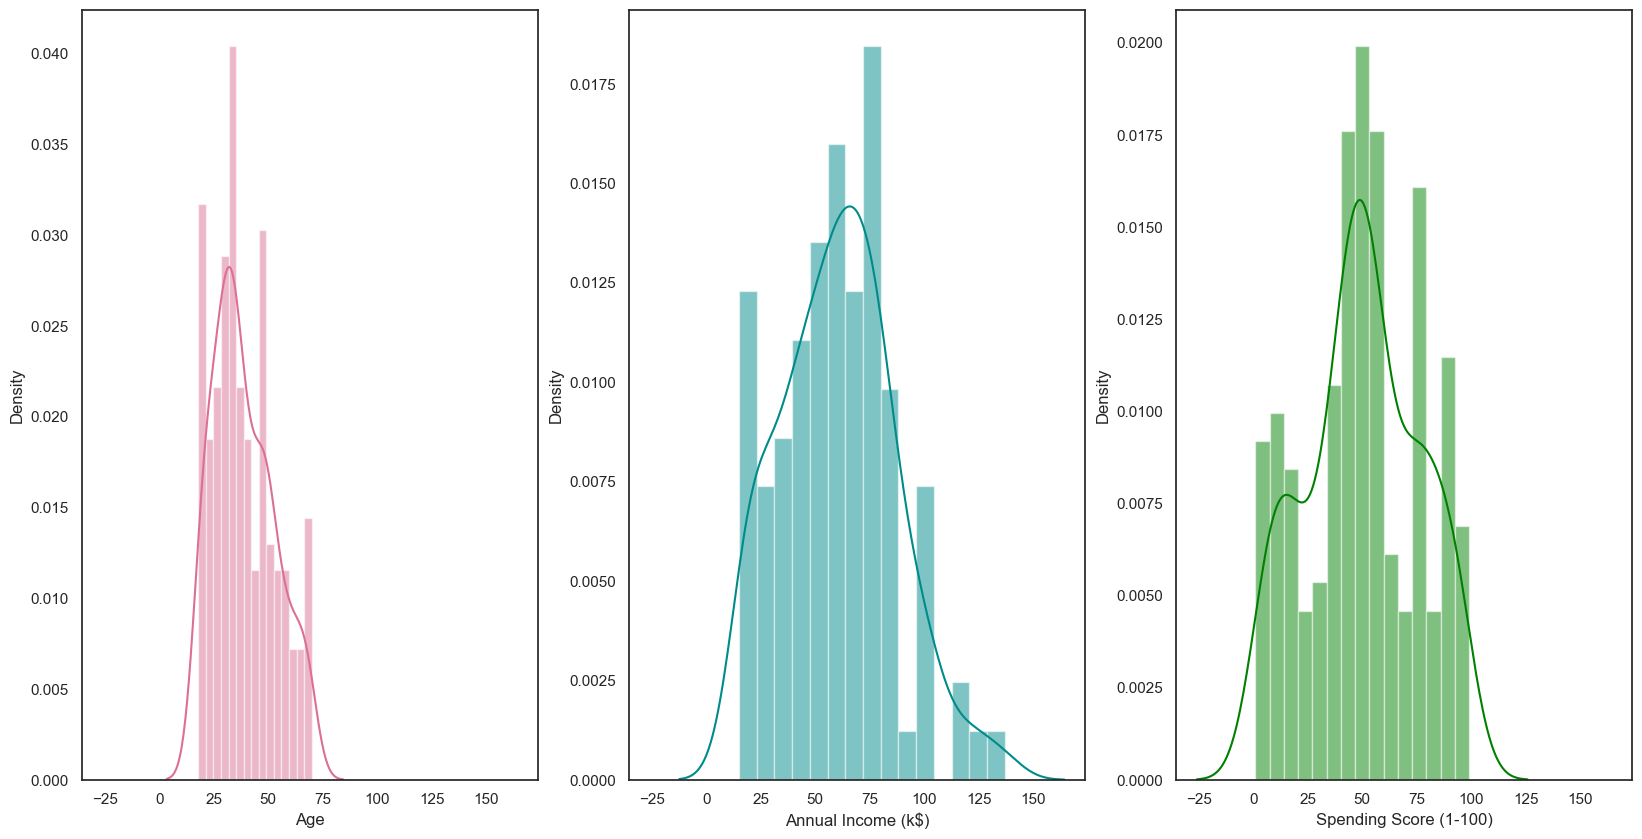

In [15]:
sns.set(style="white")
fig,axes=plt.subplots(1,3,sharex=True,figsize=(20,10))

sns.distplot(df['Age'],color="palevioletred",bins=15,hist_kws={'alpha':0.5},ax=axes[0])
sns.distplot(df['Annual Income (k$)'],color="darkcyan",bins=15,hist_kws={'alpha':0.5},ax=axes[1])
sns.distplot(df['Spending Score (1-100)'],color="green",bins=15,hist_kws={'alpha':0.5},ax=axes[2])

C:\Users\suman\AppData\Local\Temp\ipykernel_8388\2576316464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1,center=0,cmap="BrBG")


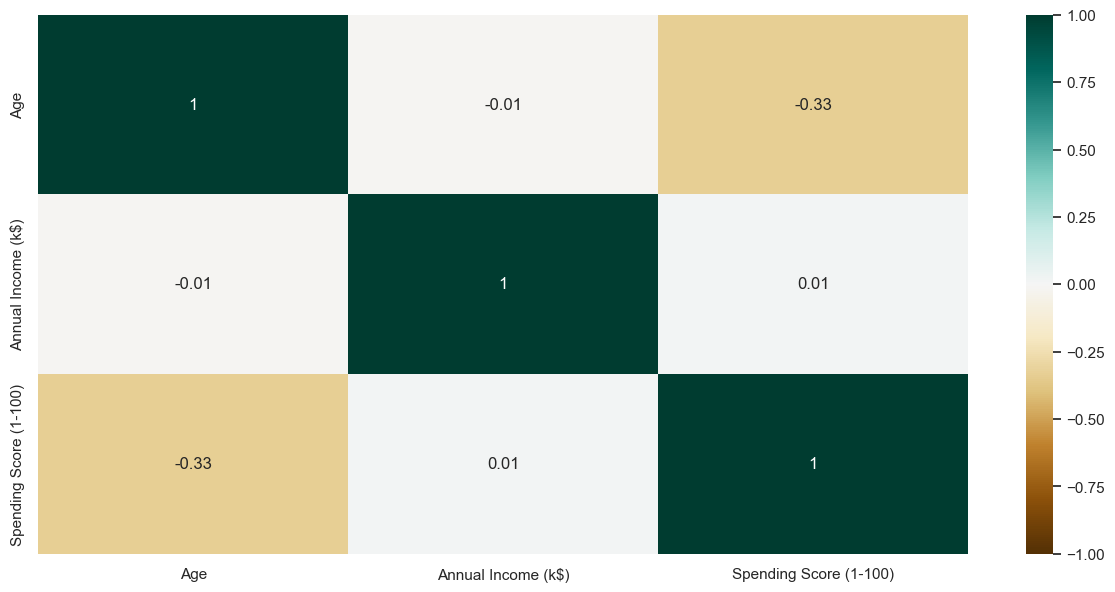

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1,center=0,cmap="BrBG")
plt.show()

In [17]:
df_income_spending=df.iloc[0:,2:4]

In [18]:
df_income_spending.head(4)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77


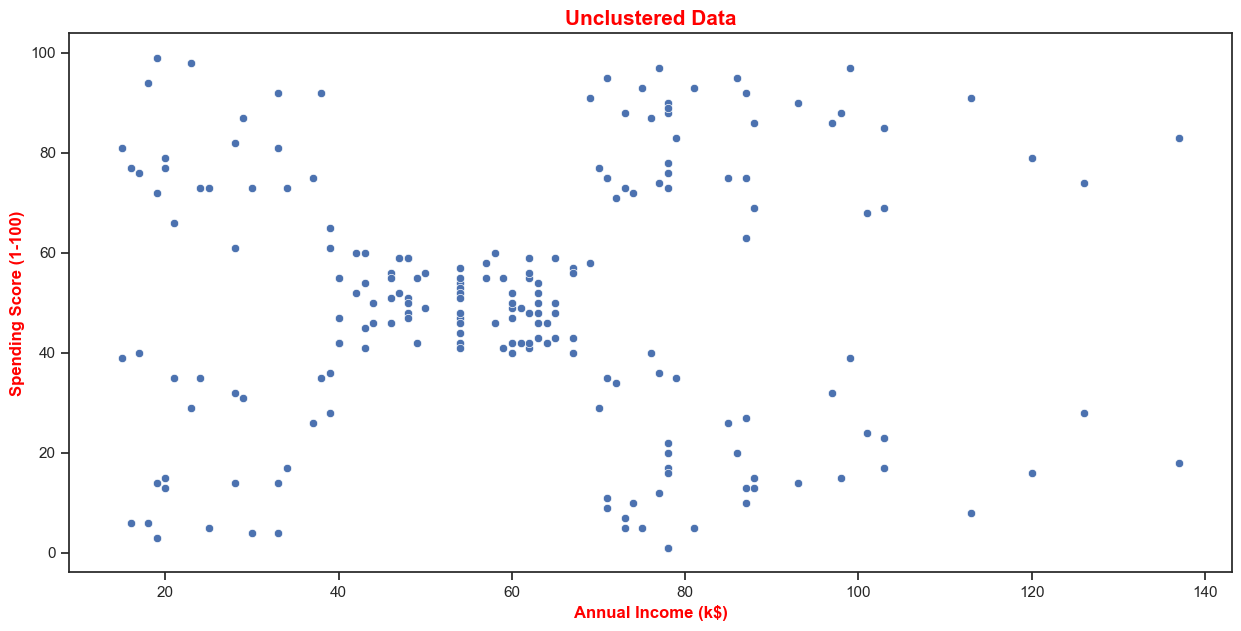

In [19]:
plt.figure(figsize=(15,7))

sns.set_style("white")
sns.set_theme(style="ticks")

ax=sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

plt.xlabel("Annual Income (k$)",size=12,fontweight="bold",color="red")
plt.ylabel("Spending Score (1-100)",size=12,fontweight="bold",color="red")

plt.title("Unclustered Data",fontweight="bold",size=15,color="red")
plt.show()

In [20]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Users\suman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\suman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\suman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\suman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

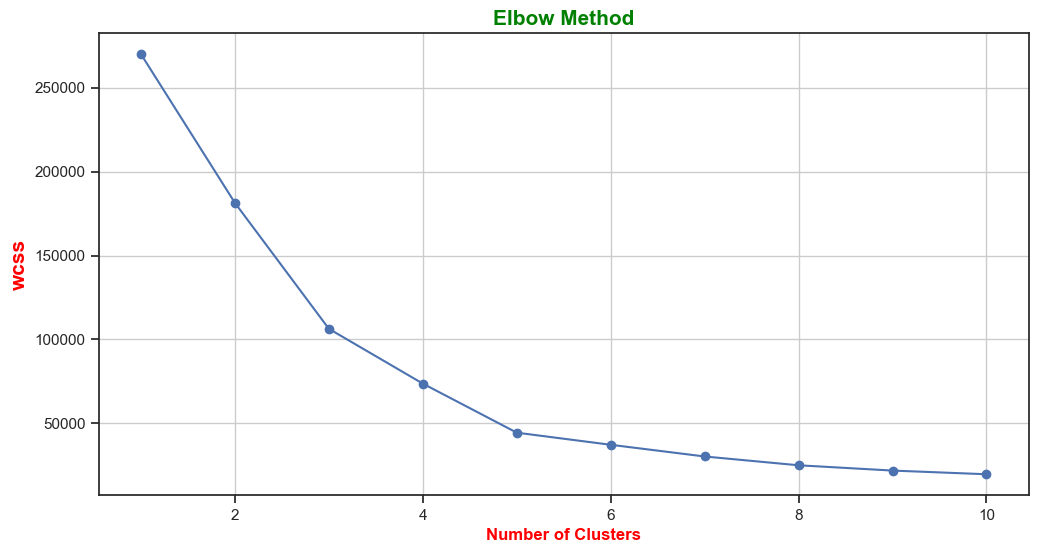

In [21]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker='o')

plt.xlabel("Number of Clusters",fontweight="bold",size=12,color="red")
plt.ylabel("wcss",fontweight="bold",size=15,color="red")
plt.title("Elbow Method",fontweight="bold",size=15,color='green')
plt.grid(True)
plt.show()

In [22]:
# Elbow diagram shows best cluster number is 5

In [23]:
# Training the K-Means Clustering Model
kmeans_model=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans_model.fit(X)

C:\Users\suman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\suman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [24]:
kmeans_model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [25]:
df['cluster']=kmeans_model.labels_
df_income_spending['cluster']=kmeans_model.labels_

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [27]:
df[df.cluster==0].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
43,Female,31,39,61,0
46,Female,50,40,55,0
47,Female,27,40,47,0
48,Female,29,40,42,0
49,Female,31,40,42,0


In [28]:
df[df.cluster==3].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
1,Male,21,15,81,3
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3


<Figure size 3000x1500 with 0 Axes>

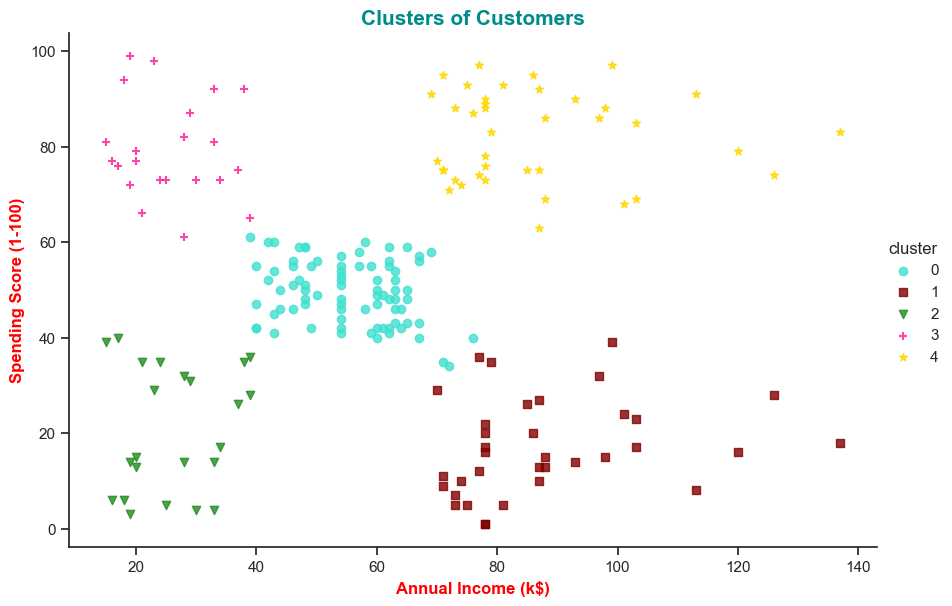

In [29]:
# Plot the clusters

colors=['turquoise','maroon','forestgreen','deeppink','gold']
markers=['o','s','v','+','*']

sns.set_style("white")
sns.set_theme(style="ticks")
plt.figure(figsize=(30,15))

sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,fit_reg=False,hue='cluster',
          markers=markers,palette=colors,height=6, aspect=1.5)

plt.title("Clusters of Customers",size=15,fontweight="bold",color='darkcyan')
plt.xlabel("Annual Income (k$)",size=12,fontweight="bold",color="red")
plt.ylabel("Spending Score (1-100)",size=12,fontweight="bold",color="red")

#plt.legend(title="Customer Cluster")
plt.show()

In [30]:
#The result of the analysis shows: 

#Cluster 0 (turquoise): These are average income earners with average spending scores. 

#Cluster 1 (maroon): This group of customers have a higher income but they do not spend more at the store. 

#Cluster 2 (forestgreen): Low-income earners with a low spending score. 

#Cluster 3 (deeppink): These are low-income earning customers with high spending scores.

#Cluster 4 (gold): The customers in this group are high-income earners with high spending scores.

In [31]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_income_spending, df_income_spending.cluster)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5552538794032924
